In [34]:
import pandas as pd
df = pd.read_csv('/content/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Data Exploration:

In [35]:

print(df['Attrition_Flag'].value_counts())

numerical_features = df.select_dtypes(include=['number'])
print(numerical_features.describe())



Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000         

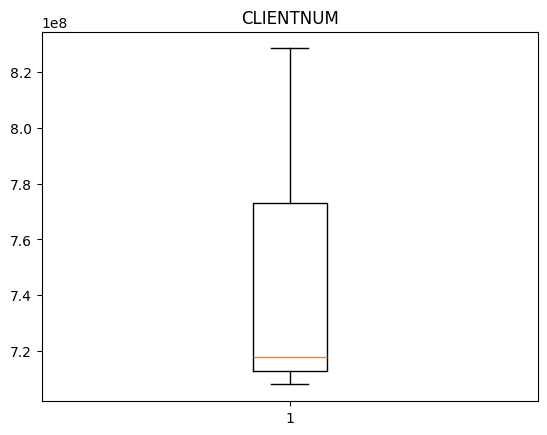

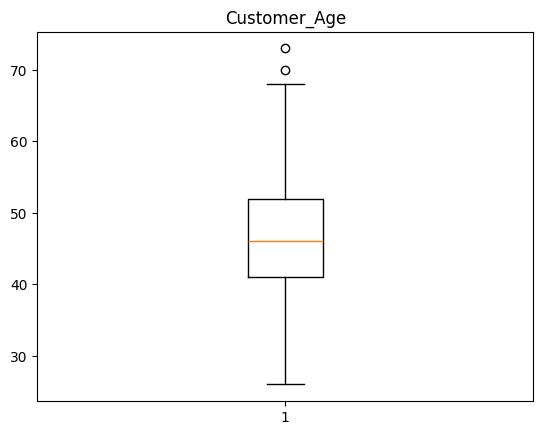

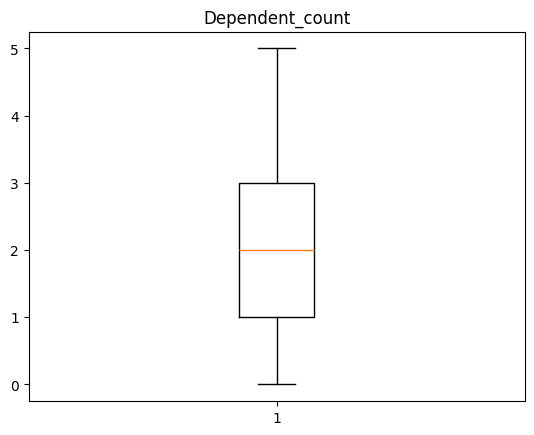

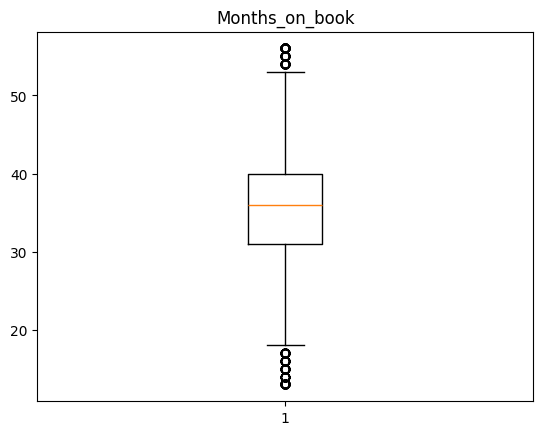

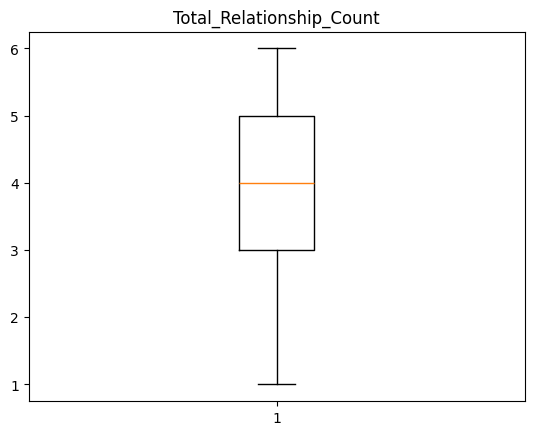

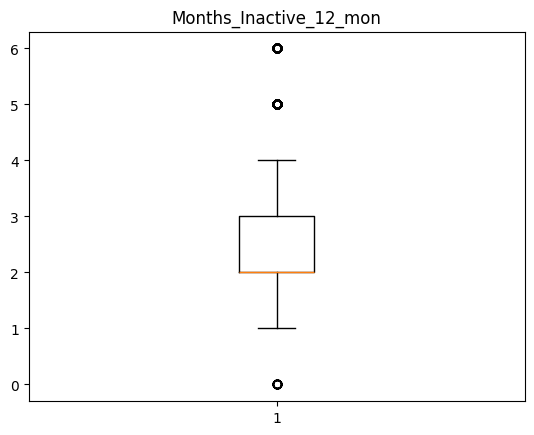

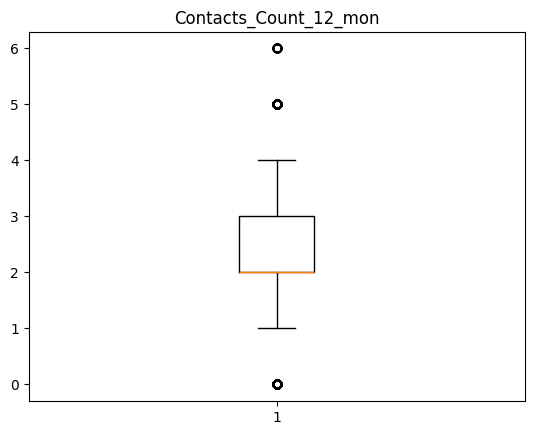

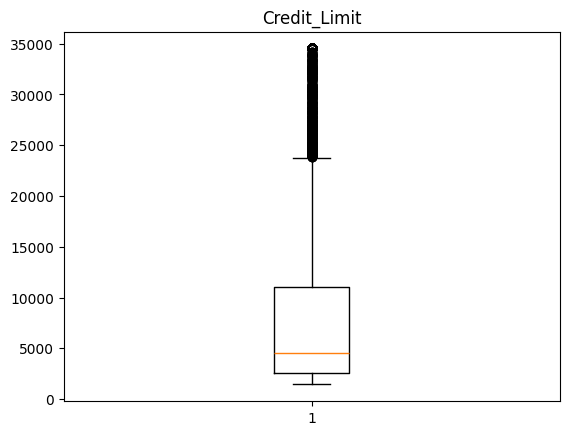

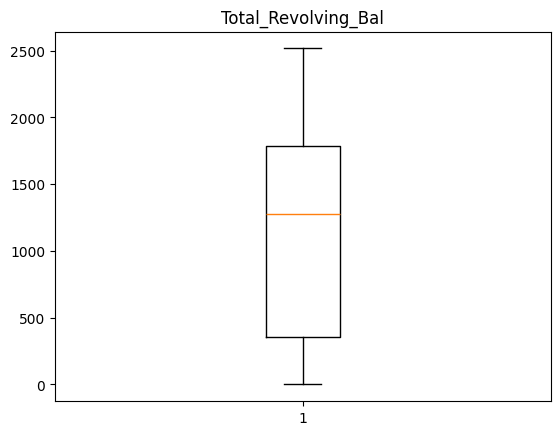

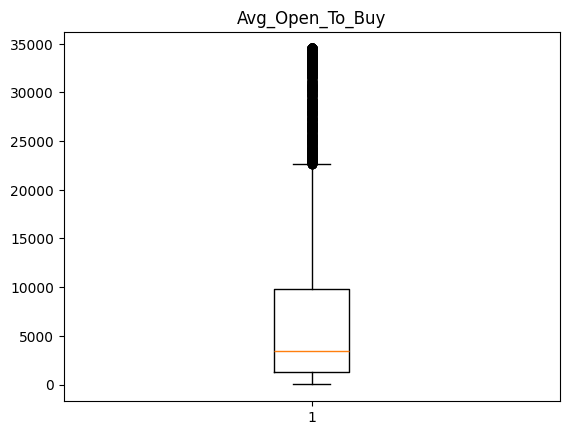

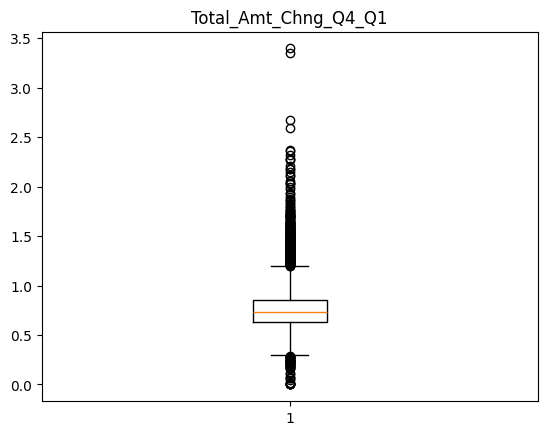

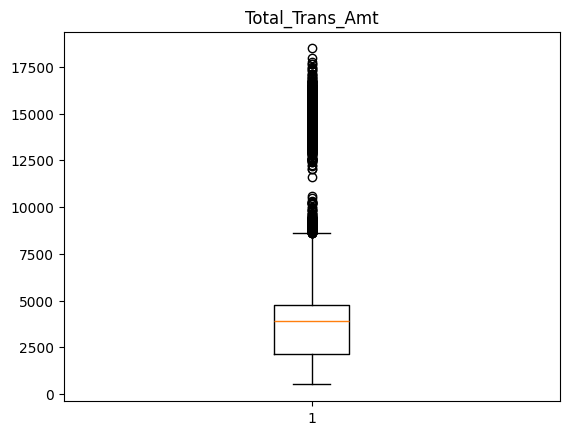

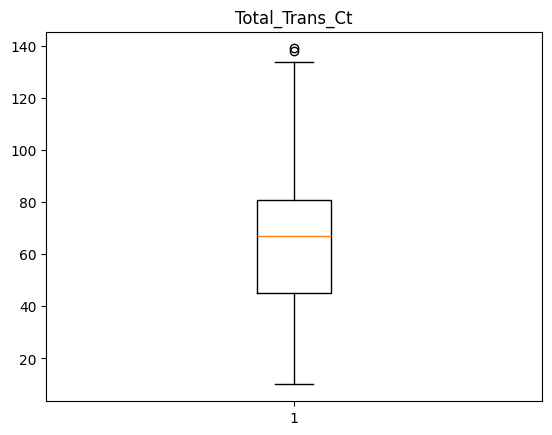

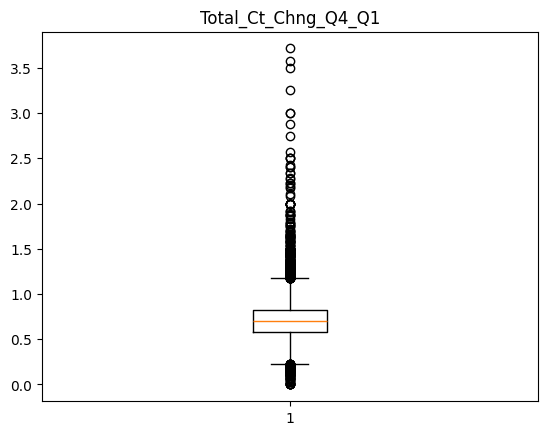

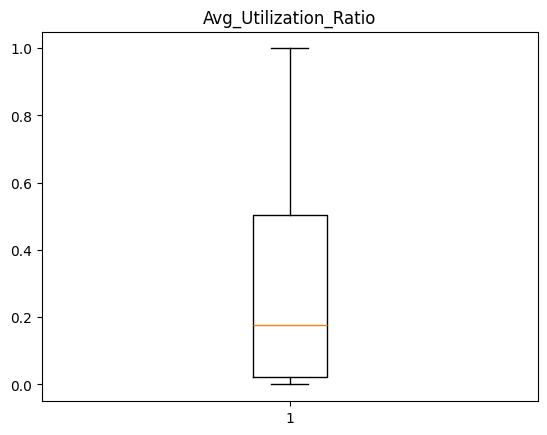

In [36]:
import matplotlib.pyplot as plt
for column in numerical_features.columns:
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()

##  Data Preprocessing:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [38]:
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number'])
df[numerical_features.columns] = scaler.fit_transform(numerical_features)

In [39]:
categorical_features = df.select_dtypes(include=['object'])
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features.columns])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features.columns))
df = df.drop(columns=categorical_features.columns)
df = pd.concat([df, encoded_df], axis=1)


## Model Training:

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert the Attrition_Flag column into a binary variable
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Handle missing values (if any)

df = df.dropna()

# Identify numerical and categorical columns

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Normalize or standardize the numerical features
scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Convert categorical variables into numerical values using one-hot encoding

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prediction:

In [44]:

print("Class distribution before splitting:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")


Class distribution before splitting:
Attrition_Flag
0.0    10127
Name: count, dtype: int64

Class distribution in training set:
Attrition_Flag
0.0    8101
Name: count, dtype: int64

Class distribution in test set:


## k-Nearest Neighbors (k-NN) Classification:
##  Data Preprocessing:

In [48]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_k = 1
best_accuracy = 0

for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_k = k

print(f"Best k value: {best_k}")

print(f"Best accuracy: {best_accuracy}")


Best k value: 1
Best accuracy: 1.0


##  Model Training:

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Prediction:

In [55]:

new_customer_features = X_test.iloc[0]

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

prediction = knn_model.predict([new_customer_features])
probabilities = knn_model.predict_proba([new_customer_features])

confidence_level = probabilities[0][0]

print(f"Prediction: {prediction[0]} (1: Churn, 0: Not Churn)")
print(f"Confidence Level: {confidence_level:.2f}")



Prediction: 0.0 (1: Churn, 0: Not Churn)
Confidence Level: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


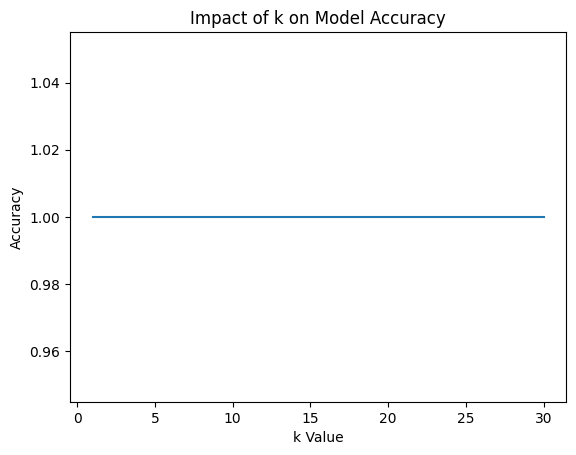

In [58]:
k_values = range(1, 31)
accuracies = []
for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Impact of k on Model Accuracy')
plt.show()


In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_reduced_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Comparison with Logistic Regression:

In [65]:
from sklearn.linear_model import LogisticRegression

# Check if y_train has more than one unique class
if len(y_train.unique()) > 1:
    # Train a Logistic Regression model if there are at least two classes
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_train, y_train)

    # Make predictions with Logistic Regression
    y_pred_logreg = logreg_model.predict(X_test)

    # Evaluate Logistic Regression performance
    accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
    print("Logistic Regression Accuracy:", accuracy_logreg)
    print(classification_report(y_test, y_pred_logreg))

    # Compare k-NN and Logistic Regression
    print("\nModel Comparison:")
    print(f"k-NN Accuracy (best k={best_k}): {best_accuracy}")
    print(f"Logistic Regression Accuracy: {accuracy_logreg}")
else:
    print(" y_train contains only one class. Logistic Regression cannot be trained.")


 y_train contains only one class. Logistic Regression cannot be trained.


## Visualization:

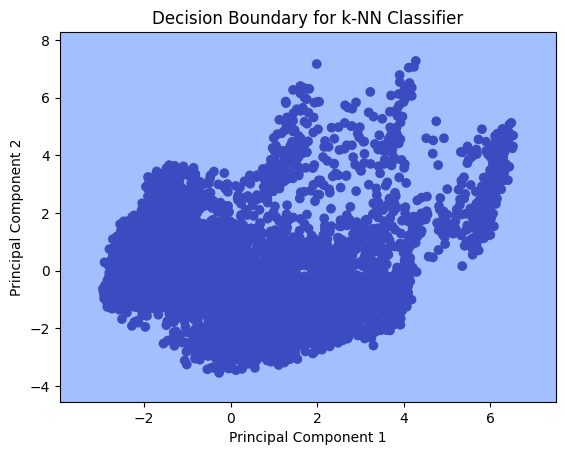

In [61]:
h = .02
x_min, x_max = X_reduced_train[:, 0].min() - 1, X_reduced_train[:, 0].max() + 1
y_min, y_max = X_reduced_train[:, 1].min() - 1, X_reduced_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary for k-NN Classifier')
plt.show()